This file takes the merged dataframe of ACS Data and NPI information for EDA


In [53]:
### Install if needed
# !pip install pgeocode
# !pip install censusgeocode

### Import Libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode as pg       #might not need here
import censusgeocode as cg  #might not need here
import matplotlib.patches as mpatches

from shapely.geometry import Point
import random

import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [5]:
### Import mergedTable
mergedTable = pd.read_pickle('mergedTableAllCounties.pkl')
mergedTable.head()

County  Provider Count       County Name householdIncomeBins hsDegreeBins  \
0  08001            11.0      Adams County           Very High     Very Low   
1  08003             1.0    Alamosa County            Very Low          Low   
2  08005            65.0   Arapahoe County           Very High       Medium   
3  08007             NaN  Archuleta County              Medium         High   
4  08009             1.0       Baca County            Very Low     Very Low   

  marriedBins cohabitingBins maleHouseholderBins femaleHouseholderBins  \
0      Medium      Very High                 Low                Medium   
1    Very Low           High           Very High                  High   
2         Low           High                 Low                  High   
3   Very High       Very Low            Very Low                   Low   
4    Very Low           High                High             Very High   

  neverMarriedBins  ... separatedBins widowedBins divorcedBins nativeBornBins  \
0        Very High  ...     Very High    Very Low          Low       Very Low   
1        Very High  ...           Low      Medium    Very High         Medium   
2        Very High  ...          High         Low       Medium       Very Low   
3         Very Low  ...      Very Low      Medium     Very Low           High   
4              Low  ...        Medium   Very High       Medium         Medium   

  foreignBornBins civilVetBins belowPovertyBins atOrAbovePovertyBins  \
0       Very High          Low              Low                 High   
1          Medium     Very Low        Very High             Very Low   
2       Very High       Medium              Low                 High   
3             Low    Very High              Low                 High   
4          Medium          Low        Very High             Very Low   

  65andOverBins 75andOverBins  
0      Very Low      Very Low  
1      Very Low           Low  
2      Very Low           Low  
3     Very High          High  
4          High     Very High  

[5 rows x 21 columns]

In [6]:
### Import Census Tract Boundaries
tracts = gpd.read_file('Colorado_County_Boundaries.geojson')
# tracts

In [7]:
tracts

OBJECTID      COUNTY               FULL       LABEL CNTY_FIPS  NUM_FIPS  \
0          1     LARIMER     Larimer County     Larimer       069        69   
1          2  LAS ANIMAS  Las Animas County  Las Animas       071        71   
2          3     FREMONT     Fremont County     Fremont       043        43   
3          4    GUNNISON    Gunnison County    Gunnison       051        51   
4          5     CONEJOS     Conejos County     Conejos       021        21   
..       ...         ...                ...         ...       ...       ...   
59        60      DENVER      Denver County      Denver       031        31   
60        61        PARK        Park County        Park       093        93   
61        62     EL PASO     El Paso County     El Paso       041        41   
62        63    ARAPAHOE    Arapahoe County    Arapahoe       005         5   
63        64    HUERFANO    Huerfano County    Huerfano       055        55   

     CENT_LAT   CENT_LONG US_FIPS  \
0   40.666413 -105.461155   08069   
1   37.315851 -104.038716   08071   
2   38.472972 -105.439657   08043   
3   38.666798 -107.031700   08051   
4   37.200696 -106.191629   08021   
..        ...         ...     ...   
59  39.762028 -104.876365   08031   
60  39.119303 -105.717175   08093   
61  38.832093 -104.525583   08041   
62  39.649772 -104.339219   08005   
63  37.684680 -104.960585   08055   

                                             geometry  
0   POLYGON ((-105.05673 40.34929, -105.05664 40.3...  
1   POLYGON ((-104.14319 37.75834, -104.14408 37.7...  
2   POLYGON ((-105.3689 38.25941, -105.36889 38.25...  
3   POLYGON ((-106.7997 38.97966, -106.80041 38.97...  
4   POLYGON ((-106.14888 37.40111, -106.15066 37.4...  
..                                                ...  
59  MULTIPOLYGON (((-104.93414 39.70015, -104.9341...  
60  POLYGON ((-105.97509 38.9101, -105.97501 38.91...  
61  POLYGON ((-104.86403 39.1298, -104.8645 39.129...  
62  MULTIPOLYGON (((-104.89916 39.62414, -104.8989...  
63  POLYGON ((-105.01374 37.88128, -105.01374 37.8...  

[64 rows x 10 columns]

In [5]:
tracts = tracts.rename(columns={'US_FIPS': 'County', 'FULL': 'County Name'})
tracts = tracts[['County', 'County Name', 'geometry']]
tracts

County        County Name  \
0   08069     Larimer County   
1   08071  Las Animas County   
2   08043     Fremont County   
3   08051    Gunnison County   
4   08021     Conejos County   
..    ...                ...   
59  08031      Denver County   
60  08093        Park County   
61  08041     El Paso County   
62  08005    Arapahoe County   
63  08055    Huerfano County   

                                             geometry  
0   POLYGON ((-105.05673 40.34929, -105.05664 40.3...  
1   POLYGON ((-104.14319 37.75834, -104.14408 37.7...  
2   POLYGON ((-105.3689 38.25941, -105.36889 38.25...  
3   POLYGON ((-106.7997 38.97966, -106.80041 38.97...  
4   POLYGON ((-106.14888 37.40111, -106.15066 37.4...  
..                                                ...  
59  MULTIPOLYGON (((-104.93414 39.70015, -104.9341...  
60  POLYGON ((-105.97509 38.9101, -105.97501 38.91...  
61  POLYGON ((-104.86403 39.1298, -104.8645 39.129...  
62  MULTIPOLYGON (((-104.89916 39.62414, -104.8989...  
63  POLYGON ((-105.01374 37.88128, -105.01374 37.8...  

[64 rows x 3 columns]

In [9]:
### Add Census Boundaries to mergedTable
mergedTableBounds = pd.merge(tracts, mergedTable, on = ['County', 'County Name'], how = 'left')
mergedTableBounds.head() 

County        County Name  \
0  08069     Larimer County   
1  08071  Las Animas County   
2  08043     Fremont County   
3  08051    Gunnison County   
4  08021     Conejos County   

                                            geometry  Provider Count  \
0  POLYGON ((-105.05673 40.34929, -105.05664 40.3...            14.0   
1  POLYGON ((-104.14319 37.75834, -104.14408 37.7...             1.0   
2  POLYGON ((-105.3689 38.25941, -105.36889 38.25...             2.0   
3  POLYGON ((-106.7997 38.97966, -106.80041 38.97...             NaN   
4  POLYGON ((-106.14888 37.40111, -106.15066 37.4...             NaN   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0                High    Very High      Medium      Very High   
1            Very Low          Low    Very Low      Very High   
2                 Low          Low         Low           High   
3                High    Very High         Low      Very High   
4            Very Low          Low         Low            Low   

  maleHouseholderBins femaleHouseholderBins  ... separatedBins widowedBins  \
0            Very Low                Medium  ...           Low         Low   
1                High                  High  ...          High        High   
2                 Low                  High  ...          High      Medium   
3           Very High              Very Low  ...      Very Low    Very Low   
4                High                  High  ...     Very High   Very High   

  divorcedBins nativeBornBins foreignBornBins civilVetBins belowPovertyBins  \
0     Very Low         Medium          Medium          Low           Medium   
1         High           High             Low         High        Very High   
2    Very High      Very High        Very Low    Very High             High   
3     Very Low           High             Low     Very Low             High   
4          Low         Medium          Medium       Medium             High   

  atOrAbovePovertyBins 65andOverBins 75andOverBins  
0               Medium           Low           Low  
1             Very Low     Very High     Very High  
2                  Low          High          High  
3                  Low      Very Low      Very Low  
4                  Low        Medium        Medium  

[5 rows x 22 columns]

In [10]:
print(type(mergedTableBounds))
length = len(mergedTableBounds)
print(length)

<class 'geopandas.geodataframe.GeoDataFrame'>
64


Update columns for Correlation Mapping

In [11]:
corrDF = mergedTableBounds.copy()
corrDF = corrDF.drop(columns=['County', 'County Name', 'geometry'])

ordinalMap = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

binColumns = [col for col in corrDF.columns if col.endswith('Bins')]
for col in binColumns:
    corrDF[col] = corrDF[col].replace(ordinalMap).astype('float')

corrDF = corrDF.dropna()

C:/Users/angel/AppData/Local/Temp/xpython_13948/3196604661.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corrDF[col] = corrDF[col].replace(ordinalMap).astype('float')
C:/Users/angel/AppData/Local/Temp/xpython_13948/3196604661.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  corrDF[col] = corrDF[col].replace(ordinalMap).astype('float')
C:/Users/angel/AppData/Local/Temp/xpython_13948/3196604661.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

Correlation Map

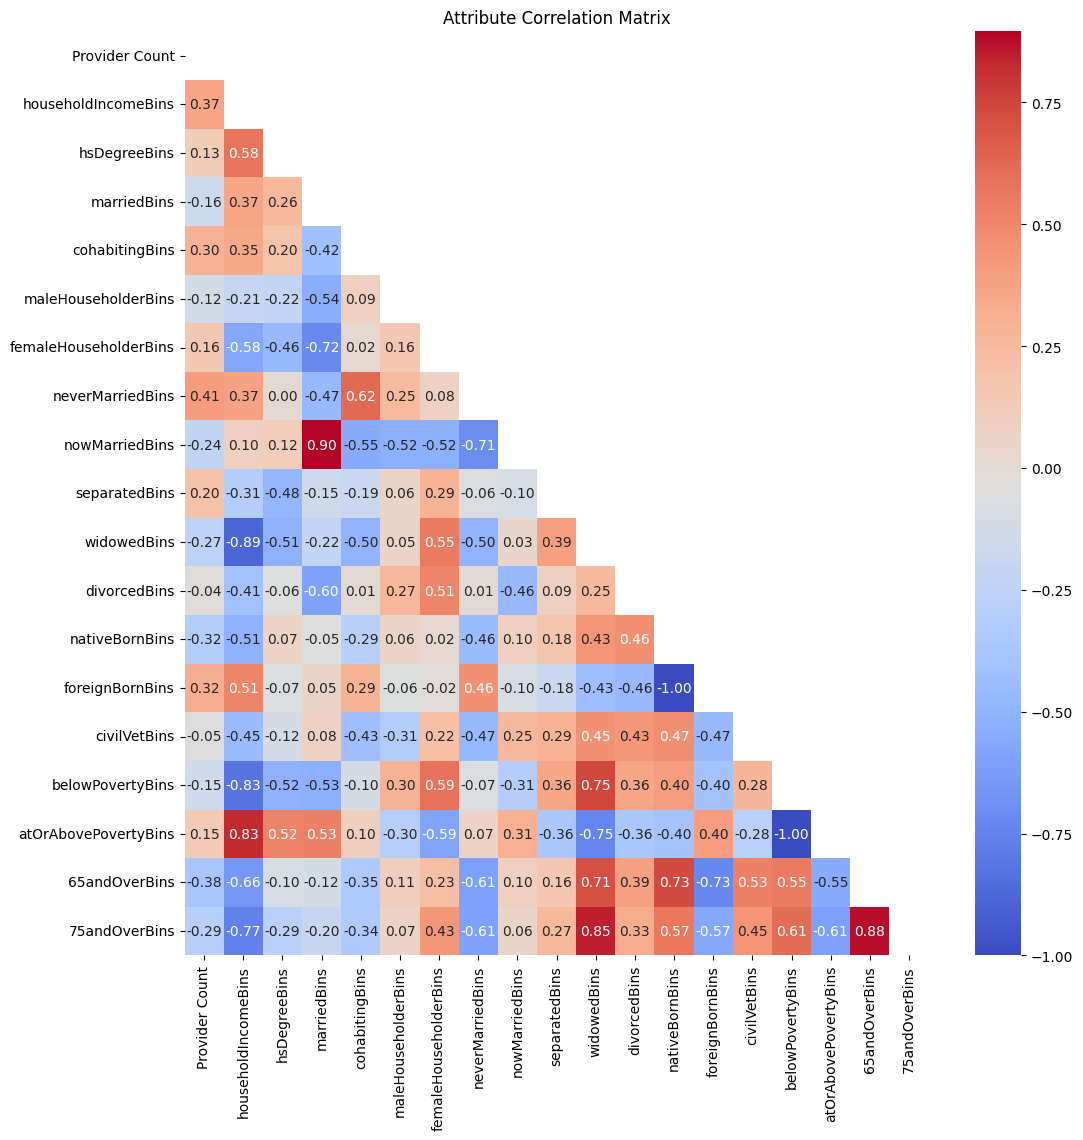

In [12]:
corrMatrix = corrDF.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Attribute Correlation Matrix')
plt.show()

In [10]:
corrMatrix

Provider Count  householdIncomeBins  hsDegreeBins  \
Provider Count               1.000000             0.368417      0.128929   
householdIncomeBins          0.368417             1.000000      0.579003   
hsDegreeBins                 0.128929             0.579003      1.000000   
marriedBins                 -0.161074             0.369755      0.263016   
cohabitingBins               0.300894             0.351782      0.195186   
maleHouseholderBins         -0.122393            -0.213958     -0.222635   
femaleHouseholderBins        0.159351            -0.576071     -0.459761   
neverMarriedBins             0.409261             0.370707      0.004872   
nowMarriedBins              -0.243538             0.096917      0.122973   
separatedBins                0.202389            -0.305398     -0.481955   
widowedBins                 -0.265508            -0.886205     -0.511359   
divorcedBins                -0.036999            -0.411897     -0.056501   
nativeBornBins              -0.318244            -0.511296      0.069613   
foreignBornBins              0.318244             0.511296     -0.069613   
civilVetBins                -0.045879            -0.452367     -0.116639   
belowPovertyBins            -0.146198            -0.827873     -0.518684   
atOrAbovePovertyBins         0.146198             0.827873      0.518684   
65andOverBins               -0.379619            -0.656133     -0.097831   
75andOverBins               -0.293700            -0.769063     -0.287830   

                       marriedBins  cohabitingBins  maleHouseholderBins  \
Provider Count           -0.161074        0.300894            -0.122393   
householdIncomeBins       0.369755        0.351782            -0.213958   
hsDegreeBins              0.263016        0.195186            -0.222635   
marriedBins               1.000000       -0.421503            -0.537963   
cohabitingBins           -0.421503        1.000000             0.091463   
maleHouseholderBins      -0.537963        0.091463             1.000000   
femaleHouseholderBins    -0.722847        0.017748             0.163452   
neverMarriedBins         -0.466387        0.623184             0.250062   
nowMarriedBins            0.895547       -0.552404            -0.519787   
separatedBins            -0.153618       -0.191729             0.059597   
widowedBins              -0.223695       -0.496796             0.052823   
divorcedBins             -0.597130        0.005076             0.269309   
nativeBornBins           -0.052894       -0.291427             0.058345   
foreignBornBins           0.052894        0.291427            -0.058345   
civilVetBins              0.076964       -0.434786            -0.313263   
belowPovertyBins         -0.526478       -0.104860             0.301229   
atOrAbovePovertyBins      0.526478        0.104860            -0.301229   
65andOverBins            -0.119822       -0.348728             0.106891   
75andOverBins            -0.204413       -0.338290             0.071065   

                       femaleHouseholderBins  neverMarriedBins  \
Provider Count                      0.159351          0.409261   
householdIncomeBins                -0.576071          0.370707   
hsDegreeBins                       -0.459761          0.004872   
marriedBins                        -0.722847         -0.466387   
cohabitingBins                      0.017748          0.623184   
maleHouseholderBins                 0.163452          0.250062   
femaleHouseholderBins               1.000000          0.082294   
neverMarriedBins                    0.082294          1.000000   
nowMarriedBins                     -0.522412         -0.706306   
separatedBins                       0.292846         -0.060613   
widowedBins                         0.551858         -0.502481   
divorcedBins                        0.514706          0.005349   
nativeBornBins                      0.023386         -0.458642   
foreignBornBins                    -0.023386          0.458642   
civilVetBin

In [14]:
### I don't want to see correlations between items from the same table
excludedGroups = [
    {'marriedBins', 'cohabitingBins', 'maleHouseholderBins', 'femaleHouseholderBins', 'neverMarriedBins', 'nowMarriedBins',	'separatedBins', 'widowedBins', 'divorcedBins'},
	{'nativeBornBins', 'foreignBornBins'},
	{'belowPovertyBins', 'atOrAbovePovertyBins'},
	{'65andOverBins', '75andOverBins'}
]

def excludedPairs(col1, col2):
    for group in excludedGroups:
        if col1 in group and col2 in group:
            return True
    return False


In [15]:
### Build correlation DF
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Var 1', 'Var 2', 'Correlation']
corrPairs = corrPairs[corrPairs['Var 1'] != corrPairs['Var 2']]

## Avoid duplicates like (A,B) and (B,A) 
corrPairs['Pair'] = corrPairs.apply(lambda row: tuple(sorted([row['Var 1'], row['Var 2']])), axis=1)
corrPairs = corrPairs.drop_duplicates('Pair')

## Fliter out excluded pairs
corrPairs = corrPairs[~corrPairs['Pair'].apply(lambda x: excludedPairs(*x))]

## Calculate abs and sort
corrPairs['AbsCorr'] = corrPairs['Correlation'].abs()
sortedCorrPairs = corrPairs.sort_values(by = 'AbsCorr', ascending=False).round(2)

sortedCorrPairs.head(75)

Var 1                 Var 2  Correlation  \
29   householdIncomeBins           widowedBins        -0.89   
208          widowedBins         75andOverBins         0.85   
34   householdIncomeBins      belowPovertyBins        -0.83   
35   householdIncomeBins  atOrAbovePovertyBins         0.83   
37   householdIncomeBins         75andOverBins        -0.77   
..                   ...                   ...          ...   
167       nowMarriedBins      belowPovertyBins        -0.31   
168       nowMarriedBins  atOrAbovePovertyBins         0.31   
28   householdIncomeBins         separatedBins        -0.31   
110  maleHouseholderBins      belowPovertyBins         0.30   
111  maleHouseholderBins  atOrAbovePovertyBins        -0.30   

                                            Pair  AbsCorr  
29            (householdIncomeBins, widowedBins)     0.89  
208                 (75andOverBins, widowedBins)     0.85  
34       (belowPovertyBins, householdIncomeBins)     0.83  
35   (atOrAbovePovertyBins, householdIncomeBins)     0.83  
37          (75andOverBins, householdIncomeBins)     0.77  
..                                           ...      ...  
167           (belowPovertyBins, nowMarriedBins)     0.31  
168       (atOrAbovePovertyBins, nowMarriedBins)     0.31  
28          (householdIncomeBins, separatedBins)     0.31  
110      (belowPovertyBins, maleHouseholderBins)     0.30  
111  (atOrAbovePovertyBins, maleHouseholderBins)     0.30  

[75 rows x 5 columns]

Mapping

In [16]:
conditions = [
    (mergedTableBounds['Provider Count'] >= 1) & (mergedTableBounds['Provider Count'] <= 10),
    (mergedTableBounds['Provider Count'] >= 11) & (mergedTableBounds['Provider Count'] <= 20),
    (mergedTableBounds['Provider Count'] >= 21) & (mergedTableBounds['Provider Count'] <= 30),
    (mergedTableBounds['Provider Count'] >= 31) & (mergedTableBounds['Provider Count'] <= 40),
    (mergedTableBounds['Provider Count'] >= 41) & (mergedTableBounds['Provider Count'] <= 50),
    (mergedTableBounds['Provider Count'] >= 51) & (mergedTableBounds['Provider Count'] <= 60),
    (mergedTableBounds['Provider Count'] >= 61) & (mergedTableBounds['Provider Count'] <= 70),
    (mergedTableBounds['Provider Count'] >= 71)
]

values = ['1-10', '11-20','21-30','31-40','41-50','51-60','61-70', '70+']

#mergedTableBounds['Provider Count Bin'] = np.select(conditions, values)

mergedTableBounds['Provider Count Bin'] = np.select(
    conditions, values, default='Other'
)

mergedTableBounds.head()

County        County Name  \
0  08069     Larimer County   
1  08071  Las Animas County   
2  08043     Fremont County   
3  08051    Gunnison County   
4  08021     Conejos County   

                                            geometry  Provider Count  \
0  POLYGON ((-105.05673 40.34929, -105.05664 40.3...            14.0   
1  POLYGON ((-104.14319 37.75834, -104.14408 37.7...             1.0   
2  POLYGON ((-105.3689 38.25941, -105.36889 38.25...             2.0   
3  POLYGON ((-106.7997 38.97966, -106.80041 38.97...             NaN   
4  POLYGON ((-106.14888 37.40111, -106.15066 37.4...             NaN   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0                High    Very High      Medium      Very High   
1            Very Low          Low    Very Low      Very High   
2                 Low          Low         Low           High   
3                High    Very High         Low      Very High   
4            Very Low          Low         Low            Low   

  maleHouseholderBins femaleHouseholderBins  ... widowedBins divorcedBins  \
0            Very Low                Medium  ...         Low     Very Low   
1                High                  High  ...        High         High   
2                 Low                  High  ...      Medium    Very High   
3           Very High              Very Low  ...    Very Low     Very Low   
4                High                  High  ...   Very High          Low   

  nativeBornBins foreignBornBins civilVetBins belowPovertyBins  \
0         Medium          Medium          Low           Medium   
1           High             Low         High        Very High   
2      Very High        Very Low    Very High             High   
3           High             Low     Very Low             High   
4         Medium          Medium       Medium             High   

  atOrAbovePovertyBins 65andOverBins 75andOverBins Provider Count Bin  
0               Medium           Low           Low              11-20  
1             Very Low     Very High     Very High               1-10  
2                  Low          High          High               1-10  
3                  Low      Very Low      Very Low              Other  
4                  Low        Medium        Medium              Other  

[5 rows x 23 columns]

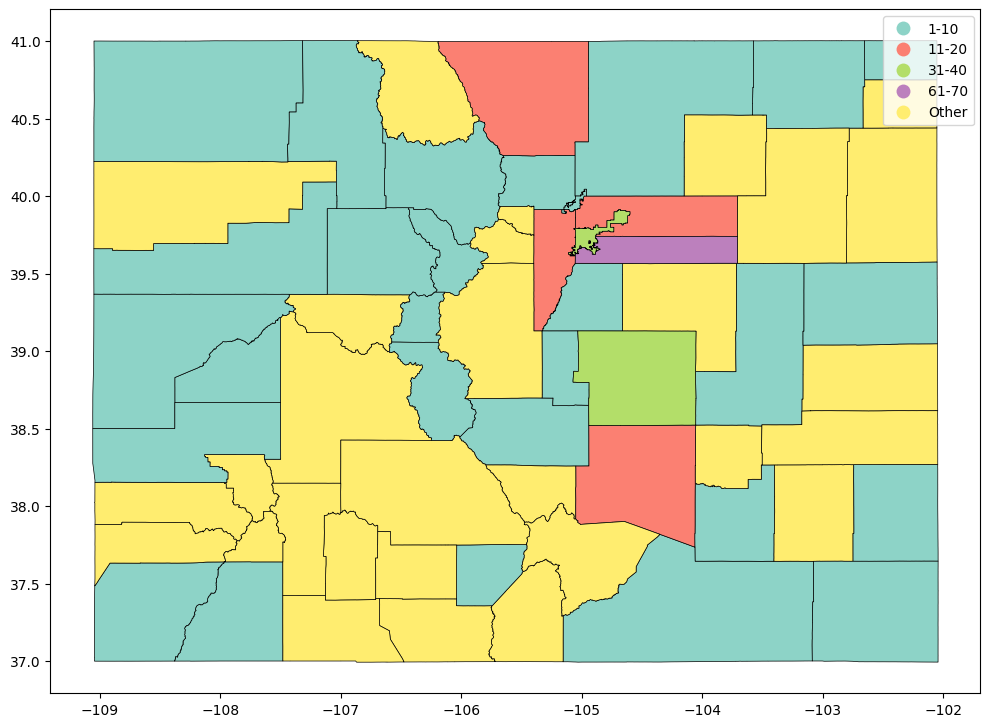

<class 'ValueError'>: aspect must be finite and positive 

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mergedTableBounds.plot(
    column = 'Provider Count Bin', 
    ax = ax, 
    cmap='Set3', 
    edgecolor='black', 
    linewidth=0.5,
    legend = True,
    categorical = True,
    )

zerosBin = mergedTableBounds[mergedTableBounds['Provider Count Bin'] == '0']
zerosBin.plot(
    ax = ax,
    color='lightgrey',
    edgecolor='black',
    linewidth=0.5,
    hatch='///',
    label='0 Hospice Providers'
)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
   
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.text(
    x=(xlim[0] + xlim[1]) / 2,
    y=ylim[1] * 0.999,
    s=f"Colorado Census Tract Boundaries by Provider Count",
    fontsize=18,
    ha='center',
    va='top',
    backgroundcolor='white',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
)

countyShape = mergedTableBounds.dissolve(by = 'County Name', as_index = False)
countyShape['labelPoint'] = countyShape.geometry.representative_point()

for idx, row in countyShape.iterrows():
    pt = row['labelPoint']
    ax.text(pt.x, pt.y,
        s = row['County Name'],
        ha = 'center',
        va = 'center',
        fontsize  = 7,
        color = 'black',
        alpha = 0.7
    )

zeroPatch = mpatches.Patch(
    facecolor = 'lightgrey',
    edgecolor = 'black',
    hatch = '///',
    label = '0 Hospice Providers'
)


plt.tight_layout()
plt.show()

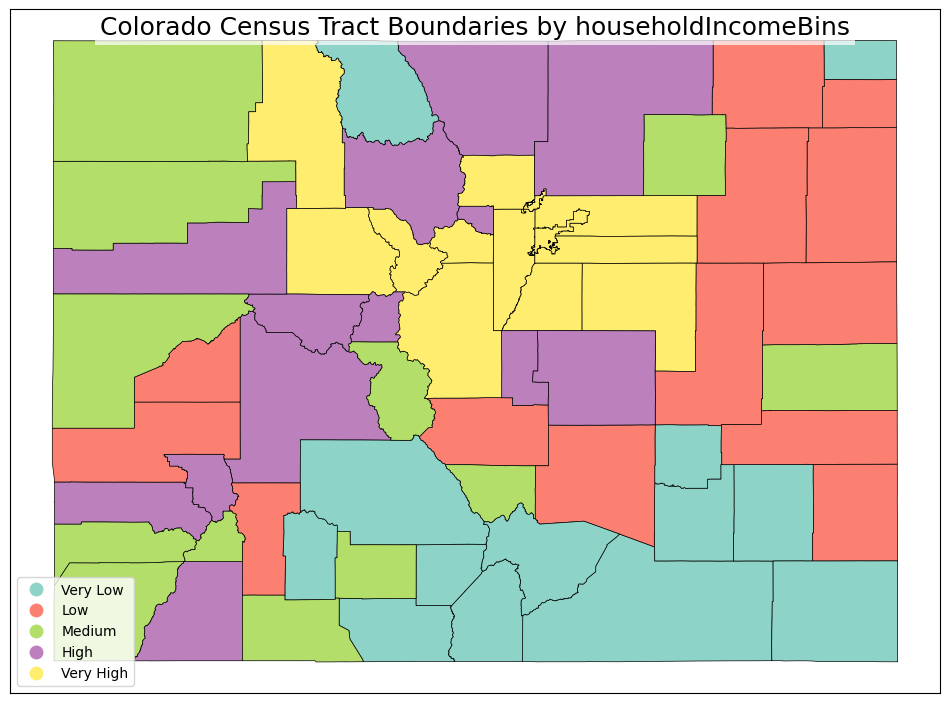

<class 'NameError'>: name 'countyShape' is not defined

In [18]:
for col in binColumns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    mergedTableBounds.plot(
        column = col, 
        ax = ax, 
        cmap='Set3', 
        edgecolor='black', 
        linewidth=0.5,
        legend = True,
        categorical = True,
        missing_kwds = {
            "color": "lightgrey",     
            "edgecolor": "black",     
            "hatch": "///",
            "label": "No Hospice Providers"
        })

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
   
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.text(
        x=(xlim[0] + xlim[1]) / 2,
        y=ylim[1] * 0.999,
        s=f"Colorado Census Tract Boundaries by {col}",
        fontsize=18,
        ha='center',
        va='top',
        backgroundcolor='white',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='square, pad=0.2')
    )


    for idx, row in countyShape.iterrows():
        pt = row['labelPoint']
        ax.text(pt.x, pt.y,
            s = row['County Name'],
            ha = 'center',
            va = 'center',
            fontsize  = 7,
            color = 'black',
            alpha = 0.7
        )

    plt.tight_layout()
    plt.show()

In [19]:
# DV adding smaller buckets for # of facilities by county:
conditions = [
    (mergedTableBounds['Provider Count'] == 1),
    (mergedTableBounds['Provider Count'] >= 2)  & (mergedTableBounds['Provider Count'] <= 5),
    (mergedTableBounds['Provider Count'] >= 6)  & (mergedTableBounds['Provider Count'] <= 10),
    (mergedTableBounds['Provider Count'] >= 11) & (mergedTableBounds['Provider Count'] <= 15),
    (mergedTableBounds['Provider Count'] >= 16) & (mergedTableBounds['Provider Count'] <= 20),
    (mergedTableBounds['Provider Count'] >= 21) & (mergedTableBounds['Provider Count'] <= 25),
    (mergedTableBounds['Provider Count'] >= 26) & (mergedTableBounds['Provider Count'] <= 30),
    (mergedTableBounds['Provider Count'] >= 31) & (mergedTableBounds['Provider Count'] <= 35),
    (mergedTableBounds['Provider Count'] >= 36) & (mergedTableBounds['Provider Count'] <= 40),
    (mergedTableBounds['Provider Count'] >= 41) & (mergedTableBounds['Provider Count'] <= 45),
    (mergedTableBounds['Provider Count'] >= 46) & (mergedTableBounds['Provider Count'] <= 50),
    (mergedTableBounds['Provider Count'] >= 51) & (mergedTableBounds['Provider Count'] <= 55),
    (mergedTableBounds['Provider Count'] >= 56) & (mergedTableBounds['Provider Count'] <= 60),
    (mergedTableBounds['Provider Count'] >= 61) & (mergedTableBounds['Provider Count'] <= 65),
    (mergedTableBounds['Provider Count'] >= 66) & (mergedTableBounds['Provider Count'] <= 70),
    (mergedTableBounds['Provider Count'] >= 71)
]

values = ['1','2-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70', '70+']

#mergedTableBounds['Provider Count Bin'] = np.select(conditions, values)

mergedTableBounds['Provider Count Bin Small'] = np.select(
    conditions, values, default='Other'
)

mergedTableBounds.head()

County        County Name  \
0  08069     Larimer County   
1  08071  Las Animas County   
2  08043     Fremont County   
3  08051    Gunnison County   
4  08021     Conejos County   

                                            geometry  Provider Count  \
0  POLYGON ((-105.05673 40.34929, -105.05664 40.3...            14.0   
1  POLYGON ((-104.14319 37.75834, -104.14408 37.7...             1.0   
2  POLYGON ((-105.3689 38.25941, -105.36889 38.25...             2.0   
3  POLYGON ((-106.7997 38.97966, -106.80041 38.97...             NaN   
4  POLYGON ((-106.14888 37.40111, -106.15066 37.4...             NaN   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0                High    Very High      Medium      Very High   
1            Very Low          Low    Very Low      Very High   
2                 Low          Low         Low           High   
3                High    Very High         Low      Very High   
4            Very Low          Low         Low            Low   

  maleHouseholderBins femaleHouseholderBins  ... divorcedBins nativeBornBins  \
0            Very Low                Medium  ...     Very Low         Medium   
1                High                  High  ...         High           High   
2                 Low                  High  ...    Very High      Very High   
3           Very High              Very Low  ...     Very Low           High   
4                High                  High  ...          Low         Medium   

  foreignBornBins civilVetBins belowPovertyBins atOrAbovePovertyBins  \
0          Medium          Low           Medium               Medium   
1             Low         High        Very High             Very Low   
2        Very Low    Very High             High                  Low   
3             Low     Very Low             High                  Low   
4          Medium       Medium             High                  Low   

  65andOverBins 75andOverBins Provider Count Bin Provider Count Bin Small  
0           Low           Low              11-20                    11-15  
1     Very High     Very High               1-10                        1  
2          High          High               1-10                      2-5  
3      Very Low      Very Low              Other                    Other  
4        Medium        Medium              Other                    Other  

[5 rows x 24 columns]

In [ ]:
mergedTableBounds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   County                    64 non-null     object  
 1   County Name               64 non-null     object  
 2   geometry                  64 non-null     geometry
 3   Provider Count            35 non-null     float64 
 4   householdIncomeBins       35 non-null     category
 5   hsDegreeBins              35 non-null     category
 6   marriedBins               35 non-null     category
 7   cohabitingBins            35 non-null     category
 8   maleHouseholderBins       35 non-null     category
 9   femaleHouseholderBins     35 non-null     category
 10  neverMarriedBins          35 non-null     category
 11  nowMarriedBins            35 non-null     category
 12  separatedBins             35 non-null     category
 13  widowedBins               35 non-null     ca

C:/Users/angel/AppData/Local/Temp/xpython_13948/2280641978.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergedTableBounds['centroid'] = mergedTableBounds.geometry.centroid


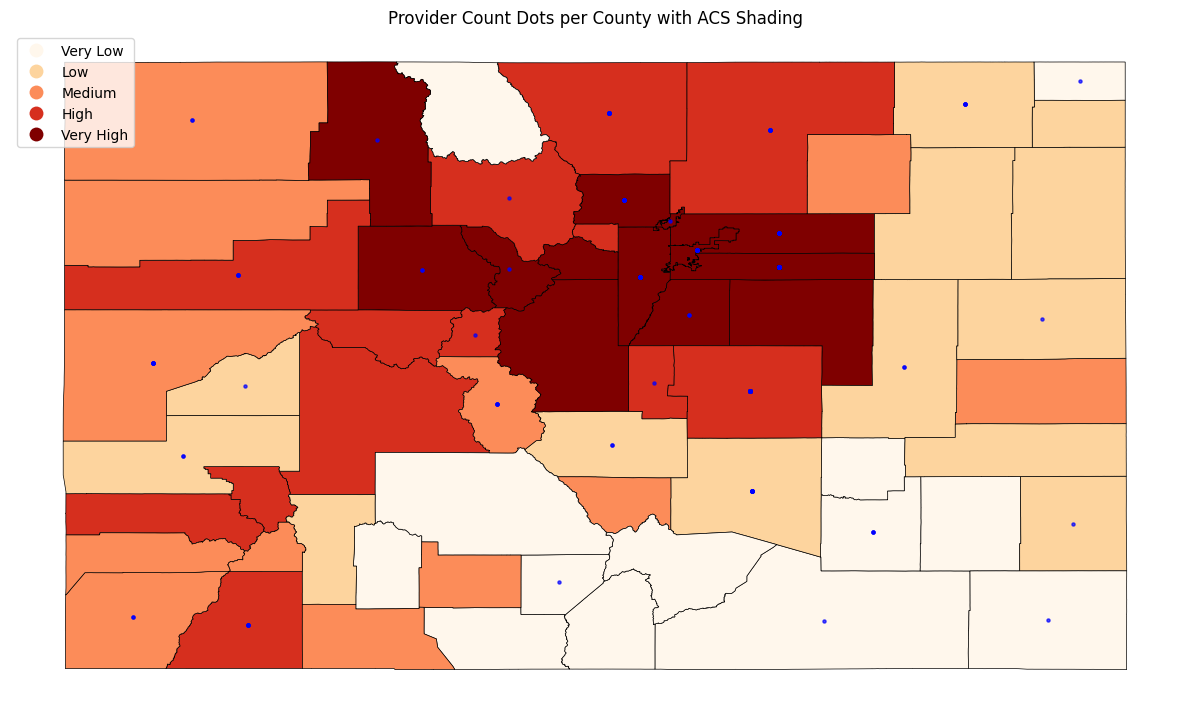

In [20]:
# Plot the base map shaded by ACS measure (e.g., householdIncome)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

mergedTableBounds.plot(
    column='householdIncomeBins',  # replace with desired ACS variable
    cmap='OrRd',               # or 'Blues', 'YlGn', etc.
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.5
)

# Plot provider dots (you’ll repeat the centroid for each provider)
mergedTableBounds['centroid'] = mergedTableBounds.geometry.centroid

# Create a DataFrame of repeated centroids based on provider count
provider_dots = mergedTableBounds.loc[mergedTableBounds['Provider Count'] > 0].apply(
    lambda row: [row['centroid']] * int(row['Provider Count']), axis=1
).explode().reset_index(drop=True)

provider_gdf = gpd.GeoDataFrame(geometry=provider_dots)
provider_gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.7)

# Clean up
plt.title("Provider Count Dots per County with ACS Shading")
plt.axis('off')
plt.tight_layout()
plt.show()

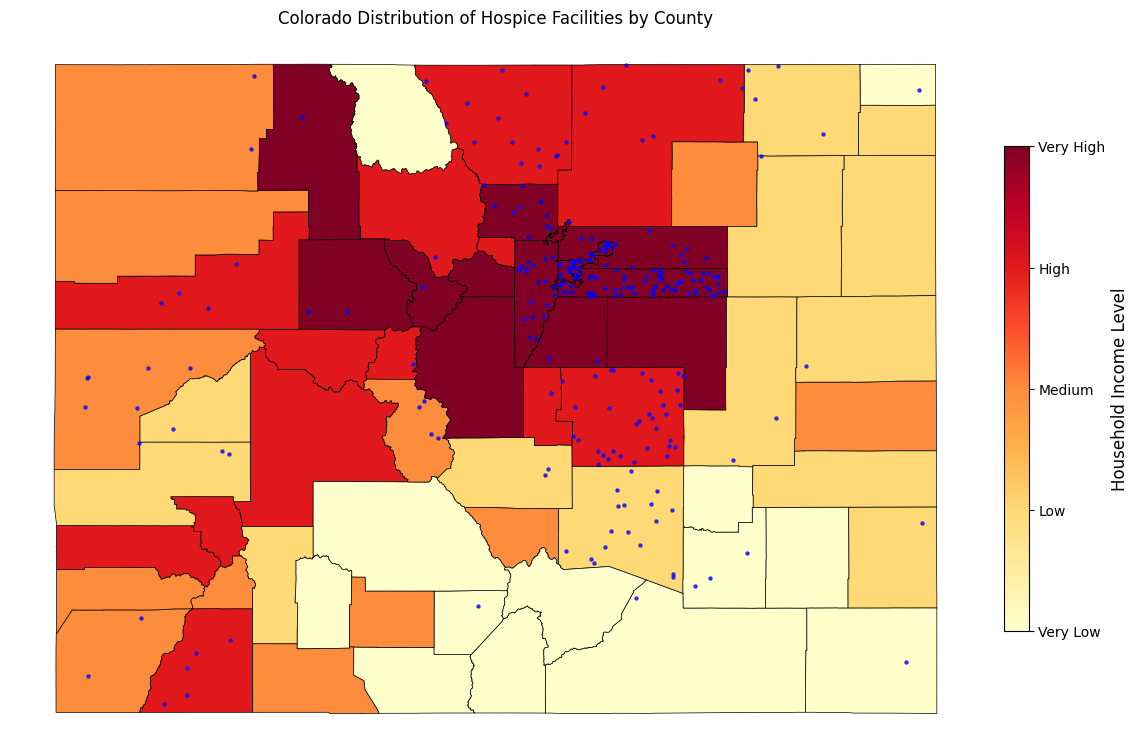

In [ ]:
# if Provider Count is NaN, then 0
mergedTableBounds['Provider Count'] = mergedTableBounds['Provider Count'].fillna(0).astype(int)

# Function to generate N random points within a polygon
def generate_random_points_in_polygon(polygon, num_points):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < num_points:
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Copy your original GeoDataFrame (assume it's called gdf)
provider_points = []

# For each county, generate one dot per provider randomly within the polygon
for _, row in mergedTableBounds.iterrows():
    polygon = row.geometry
    count = int(row['Provider Count'])
    if count > 0:
        points = generate_random_points_in_polygon(polygon, count)
        provider_points.extend(points)

# Create a GeoDataFrame of all provider dots
provider_gdf = gpd.GeoDataFrame(geometry=provider_points, crs=mergedTableBounds.crs)

fig, ax = plt.subplots(figsize=(12, 10))

# Define colormap and normalize values
cmap = plt.cm.YlOrRd
norm = mcolors.Normalize(vmin=mergedTableBounds['householdIncomeBins'].astype('category').cat.codes.min(),
                         vmax=mergedTableBounds['householdIncomeBins'].astype('category').cat.codes.max())

# Convert category to numeric code for mapping
mergedTableBounds['acs_code'] = mergedTableBounds['householdIncomeBins'].astype('category').cat.codes

# Plot shaded counties
mergedTableBounds.plot(
    column='acs_code',
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Plot provider dots (same as before)
provider_gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.7)

# Create colorbar/legend
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.5, pad=0.02)
cbar.set_label("Household Income Level", fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')

# Optional: use original category labels for ticks
tick_labels = mergedTableBounds['householdIncomeBins'].astype('category').cat.categories.tolist()
cbar.set_ticks(range(len(tick_labels)))
cbar.set_ticklabels(tick_labels)

# Clean up
plt.title("Colorado Distribution of Hospice Facilities by County")
plt.axis('off')
plt.tight_layout()
plt.show()

In [45]:
# merge table with Alzheimer's rates:
df_alz = pd.read_pickle('df_alzheimers.pkl')
df_alz['County Name Short'] = df_alz['County']
mergedTableBounds['County Name Short']  = mergedTableBounds['County Name'].str.replace(' County', '', regex=False)


mergedTable_alz = pd.merge(mergedTableBounds, df_alz, on = 'County Name Short', how = 'outer')

mergedTable_alz.head()

County_x       County Name  \
0    08001      Adams County   
1    08003    Alamosa County   
2    08005   Arapahoe County   
3    08007  Archuleta County   
4    08009       Baca County   

                                            geometry  Provider Count  \
0  POLYGON ((-104.5825 39.73964, -104.58233 39.73...              11   
1  POLYGON ((-106.03931 37.57699, -106.03931 37.5...               1   
2  MULTIPOLYGON (((-104.89916 39.62414, -104.8989...              65   
3  POLYGON ((-107.25498 37.00001, -107.25489 37.0...               0   
4  POLYGON ((-102.27024 36.99433, -102.27013 36.9...               1   

  householdIncomeBins hsDegreeBins marriedBins cohabitingBins  \
0           Very High     Very Low      Medium      Very High   
1            Very Low          Low    Very Low           High   
2           Very High       Medium         Low           High   
3              Medium         High   Very High       Very Low   
4            Very Low     Very Low    Very Low           High   

  maleHouseholderBins femaleHouseholderBins  ... Provider Count Bin Small  \
0                 Low                Medium  ...                    11-15   
1           Very High                  High  ...                        1   
2                 Low                  High  ...                    61-65   
3            Very Low                   Low  ...                    Other   
4                High             Very High  ...                        1   

                      centroid acs_code householdIncomeNum        CountyName  \
0  POINT (-104.33795 39.87364)        4                NaN      Adams County   
1    POINT (-105.7883 37.5729)        0                NaN    Alamosa County   
2  POINT (-104.33923 39.64978)        4                NaN   Arapahoe County   
3   POINT (-107.04834 37.1936)        2                NaN  Archuleta County   
4  POINT (-102.56048 37.31919)        0                NaN       Baca County   

  County Name Short   County_y Total Pop. Age 65+ AD Cases Age 65+  \
0             Adams      Adams             57,400            6,100   
1           Alamosa    Alamosa              2,400              300   
2          Arapahoe   Arapahoe             92,000            9,800   
3         Archuleta  Archuleta              3,900              300   
4              Baca       Baca                900              100   

  AD Prevalence (Age 65+)  
0                   10.7%  
1                   11.5%  
2                   10.6%  
3                    8.8%  
4                   12.5%  

[5 rows x 33 columns]

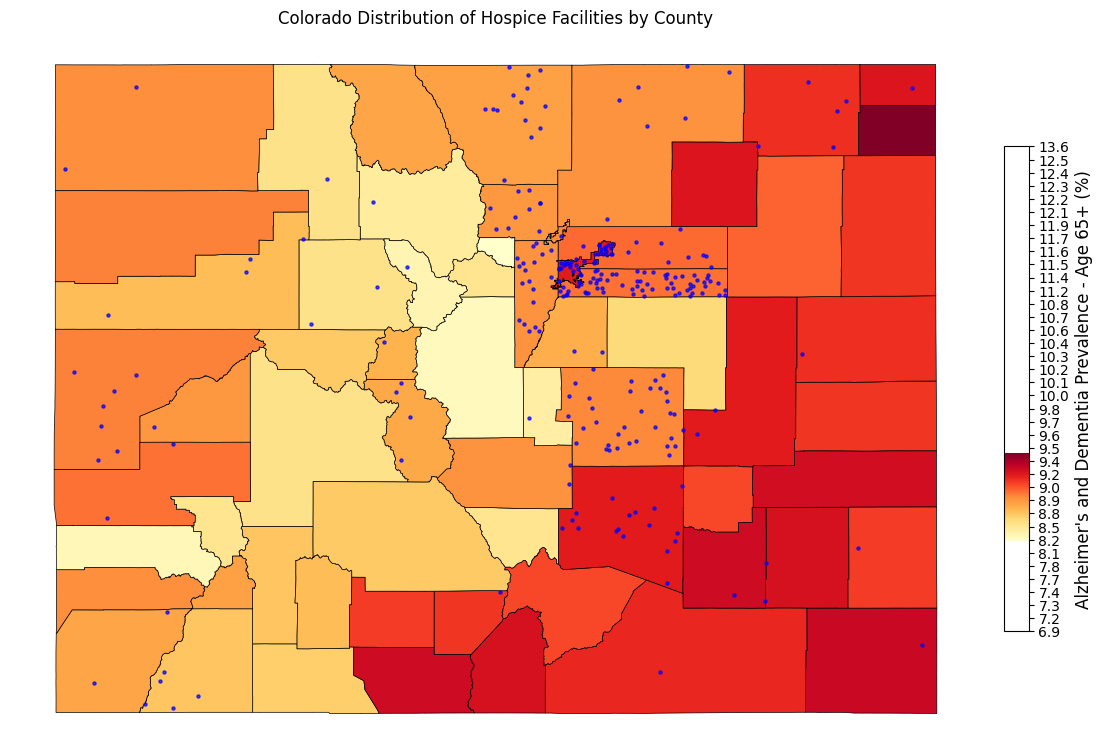

In [ ]:
# if Provider Count is NaN, then 0
mergedTable_alz['Provider Count'] = mergedTable_alz['Provider Count'].fillna(0).astype(int)

# Remove '%' and convert to float
mergedTable_alz['AD Prevalence (Age 65+)'] = (
    mergedTable_alz['AD Prevalence (Age 65+)']
    .str.replace('%', '', regex=False)
    .astype(float)
)

bins = [0, 5, 10, 15, float('inf')]
labels = ['0–5%', '5–10%', '10–15%', '>15%']

mergedTable_alz['prevalence_bin'] = pd.cut(
    mergedTable_alz['AD Prevalence (Age 65+)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Function to generate N random points within a polygon
def generate_random_points_in_polygon(polygon, num_points):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < num_points:
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Copy your original GeoDataFrame (assume it's called gdf)
provider_points = []

# For each county, generate one dot per provider randomly within the polygon
for _, row in mergedTable_alz.iterrows():
    polygon = row.geometry
    count = int(row['Provider Count'])
    if count > 0:
        points = generate_random_points_in_polygon(polygon, count)
        provider_points.extend(points)

# Create a GeoDataFrame of all provider dots
provider_gdf = gpd.GeoDataFrame(geometry=provider_points, crs=mergedTable_alz.crs)

fig, ax = plt.subplots(figsize=(12, 10))

# Define colormap and normalize values
cmap = plt.cm.YlOrRd
norm = mcolors.Normalize(
    vmin=mergedTable_alz['AD Prevalence (Age 65+)'].min(),
    vmax=mergedTable_alz['AD Prevalence (Age 65+)'].max()
)
# Convert category to numeric code for mapping
mergedTable_alz['acs_code'] = mergedTable_alz['AD Prevalence (Age 65+)'].astype('category').cat.codes

# Plot shaded counties
mergedTable_alz.plot(
    column='AD Prevalence (Age 65+)',
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Plot provider dots (same as before)
provider_gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.7)

# Create colorbar/legend
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.5, pad=0.02)
cbar.set_label("Alzheimer's and Dementia Prevalence - Age 65+ (%)", fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')

# Optional: use original category labels for ticks
tick_labels = mergedTable_alz['AD Prevalence (Age 65+)'].astype('category').cat.categories.tolist()
cbar.set_ticks(range(len(tick_labels)))
cbar.set_ticklabels(tick_labels)

# Clean up
plt.title("Colorado Distribution of Hospice Facilities by County")
plt.axis('off')
plt.tight_layout()
plt.show()

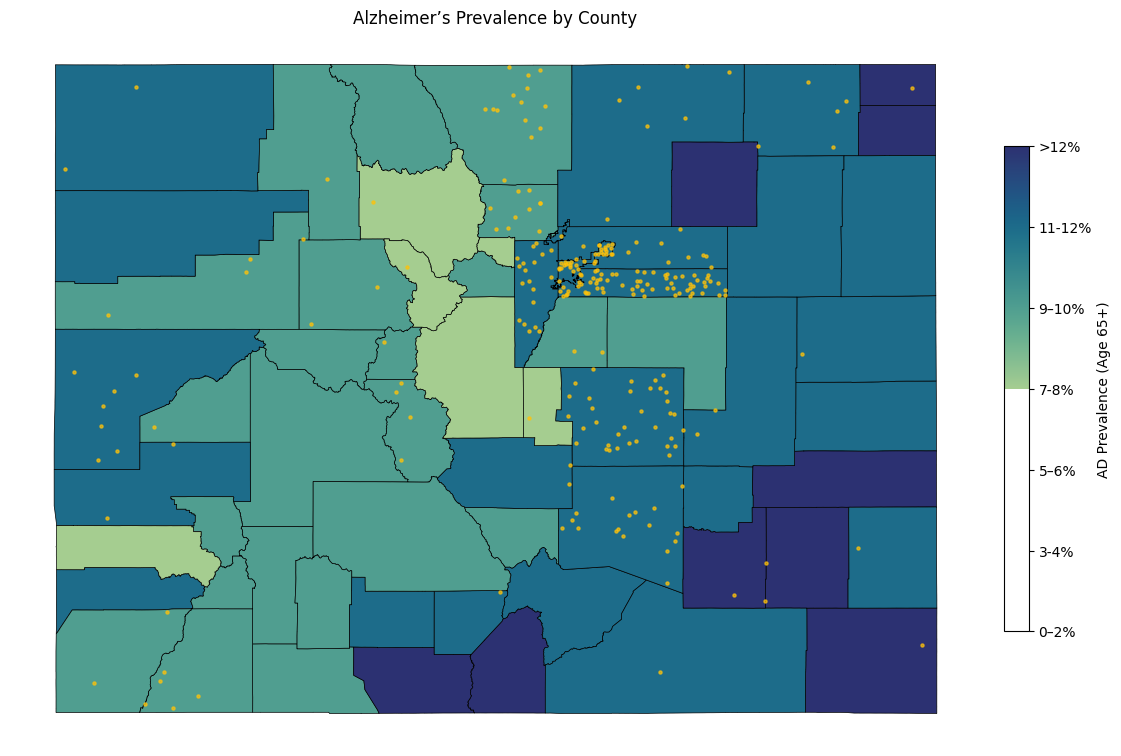

In [ ]:
cmap = sns.color_palette("crest", as_cmap=True)

# creating bins for AD rates
bins = [0, 2, 4, 6, 8, 10, 12, float('inf')]
labels = ['0–2%', '3-4%','5–6%', '7-8%', '9–10%', '11-12%', '>12%']

mergedTable_alz['prevalence_bin'] = pd.cut(
    mergedTable_alz['AD Prevalence (Age 65+)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

mergedTable_alz['prevalence_code'] = mergedTable_alz['prevalence_bin'].cat.codes

fig, ax = plt.subplots(figsize=(12, 10))

# Define colormap
#cmap = plt.cm.OrRd

'''
norm = mcolors.Normalize(
    vmin=mergedTable_alz['prevalence_code'].min(),
    vmax=mergedTable_alz['prevalence_code'].max()
)'''

norm = mcolors.Normalize(
    vmin=mergedTable_alz['prevalence_code'].min(),
    vmax=mergedTable_alz['prevalence_code'].max()
)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.5, pad=0.02)
cbar.set_label("AD Prevalence (Age 65+)")

# Plot the shaded counties by prevalence bin
mergedTable_alz.plot(
    column='prevalence_code',
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Plot provider dots if needed
provider_gdf.plot(ax=ax, color='#FFC20A', markersize=5, alpha=0.7)

# Colorbar
#sm = cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.5, pad=0.02)
#cbar.set_label("AD Prevalence (Age 65+)", fontsize=12)

# Use the bin labels as tick labels
cbar.set_ticks(range(len(labels)))
cbar.set_ticklabels(labels)

# Final touches
plt.title("Alzheimer’s and Dementia Prevalence by County")
plt.axis('off')
plt.tight_layout()
plt.show()

In [73]:
# Create a mapping from category to number
bin_mapping = {
    'very low': 1,
    'low': 2,
    'medium': 3,
    'high': 4,
    'very high': 5
}

# Add a new numeric column for folium coloring
mergedTableBounds['householdIncomeNum'] = mergedTableBounds['householdIncomeBins'].map(bin_mapping)

In [37]:
import folium
from folium.plugins import MarkerCluster

# Simplify geometry for faster rendering
gdf = mergedTableBounds.to_crs(epsg=4326)
gdf['ProviderCount'] = gdf['Provider Count']

# Drop non-geometry shapely objects (like centroid)
gdf = gdf.drop(columns=[col for col in gdf.columns if gdf[col].dtype.name == 'geometry' and col != gdf.geometry.name])

# Initialize map centered around your state/country
center = gdf.geometry.centroid.unary_union.centroid
m = folium.Map(location=[center.y, center.x], zoom_start=7)

# Shade counties based on householdIncome
folium.Choropleth(
    geo_data=gdf.to_json(),
    name="Choropleth",
    data=gdf,
    columns=["County", "householdIncomeNum"], 
    key_on="feature.properties.County",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Household Income Level"
).add_to(m)

# Add provider dots
marker_cluster = MarkerCluster().add_to(m)

for _, row in gdf.iterrows():
    centroid = row.geometry.centroid
    for _ in range(int(row.ProviderCount)):
        folium.CircleMarker(
            location=[centroid.y, centroid.x],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=0.6
        ).add_to(marker_cluster)

# Save or display
m.save("provider_map.html")
m


C:/Users/angel/AppData/Local/Temp/xpython_13948/1353254321.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf.geometry.centroid.unary_union.centroid
C:/Users/angel/AppData/Local/Temp/xpython_13948/1353254321.py:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdf.geometry.centroid.unary_union.centroid
